#### Import Libraries

In [1]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

# Data Understanding

In [2]:
dataset_path = 'Dataset'
subsets = ['Training','Testing'] # Dataset divided into 2 subsets: training and testing

In [3]:
image_data = []

for subset in subsets: # goes through the 2 subsets training and testing
    subset_path = os.path.join(dataset_path,subset)
    diagnoses = os.listdir(subset_path) # Returns a list of diagnoses

    for diag in diagnoses: # iterates over the diagnoses
        diagnoses_folder = os.path.join(subset_path, diag )
        for img_file in os.listdir(diagnoses_folder):
            img_path = os.path.join(diagnoses_folder, img_file) # gets the image path within the diagnoses folder 
            with Image.open(img_path) as img: 
                width, height = img.size # Collects the width, height, and mode of the images
                mode = img.mode
                image_data.append({ # adds all the collected info for each image to the list
                    'subset':subset,
                    'diagnosis': diag,
                    'width': width,
                    'height': height,
                    'mode': mode,
                    'image': np.array(img) #image converted to numpy array
                })


df = pd.DataFrame(image_data)
    

In [4]:
df.head()

,subset,diagnosis,width,height,mode,image
0,Training,glioma,512,512,RGB,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,Training,glioma,512,512,RGB,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,Training,glioma,512,512,RGB,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,Training,glioma,512,512,RGB,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,Training,glioma,512,512,RGB,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [5]:
# Number of images for training and testing for each diagnosis
df.groupby(['subset', 'diagnosis']).size().unstack()


diagnosis,glioma,meningioma,notumor,pituitary
subset,,,,
Testing,300,306,405,300
Training,1321,1339,1595,1457


In [6]:
df_train = df[df['subset'] == 'Training']
df_test = df[df['subset'] == 'Testing']

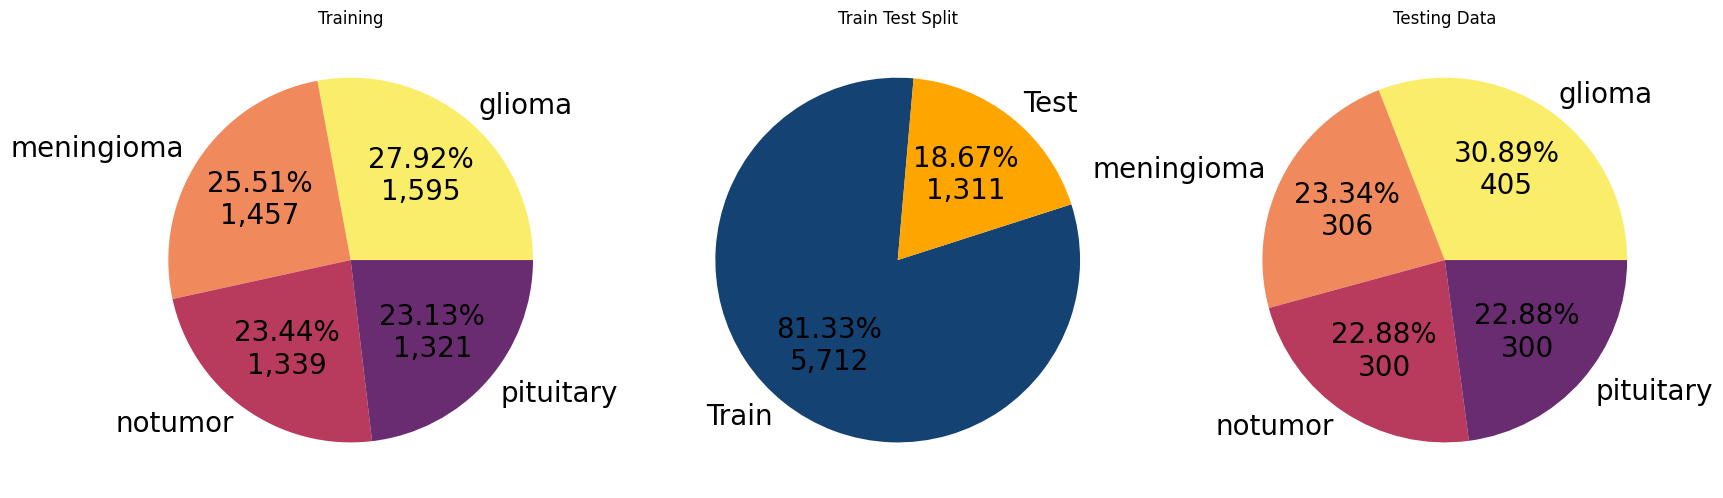

In [7]:
fig, ax = plt.subplots(ncols = 3,figsize=(20,14))

# training data split
ax[0].pie(df_train['diagnosis'].value_counts(), labels= pd.unique(df['diagnosis']),colors = ["#F9ED69", "#F08A5D", "#B83B5E", "#6A2C70"], 
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(df_train['diagnosis'].value_counts()) / 100),
    textprops={'fontsize': 20})
ax[0].set_title("Training")

# train test split
ax[1].set_title("Train Test Split")
ax[1].pie(
    [len(df_train), len(df_test)], 
    labels=['Train', 'Test'], 
    colors=['#144272', 'orange'],  # Fixed colors syntax and spelling
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * (len(df_train) + len(df_test)) / 100),
    startangle=85, 
    textprops={'fontsize': 20}
)

# testing data split
ax[2].set_title('Testing Data')
ax[2].pie(df_test['diagnosis'].value_counts(), labels= pd.unique(df['diagnosis']), colors=["#F9ED69", "#F08A5D", "#B83B5E", "#6A2C70"], 
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(df_test['diagnosis'].value_counts()) / 100),
    textprops={'fontsize': 20 })

plt.show()

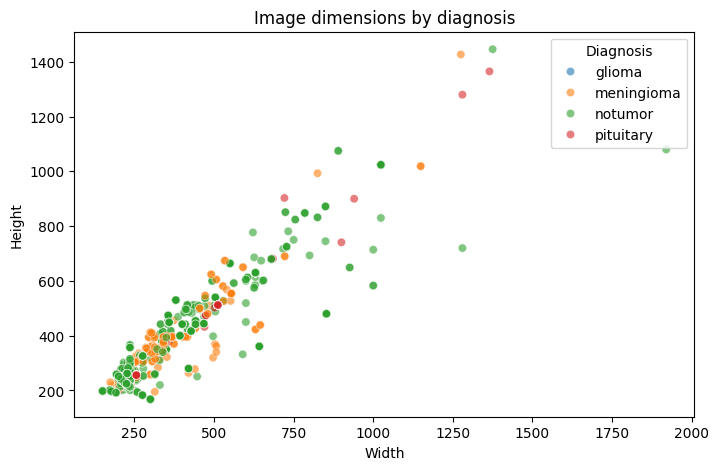

In [8]:
# Distribution of image dimensions 
plt.figure(figsize=(8,5))
sns.scatterplot(data = df, x='width',y='height', hue='diagnosis',alpha=0.6)
plt.title('Image dimensions by diagnosis')
plt.xlabel('Width')
plt.ylabel('Height')
plt.legend(title='Diagnosis')
plt.show()

In [9]:
# Displaying the mode of images, shows inconsistency across images
df['mode'].value_counts()

mode
RGB     3926
L       3093
RGBA       3
P          1
Name: count, dtype: int64

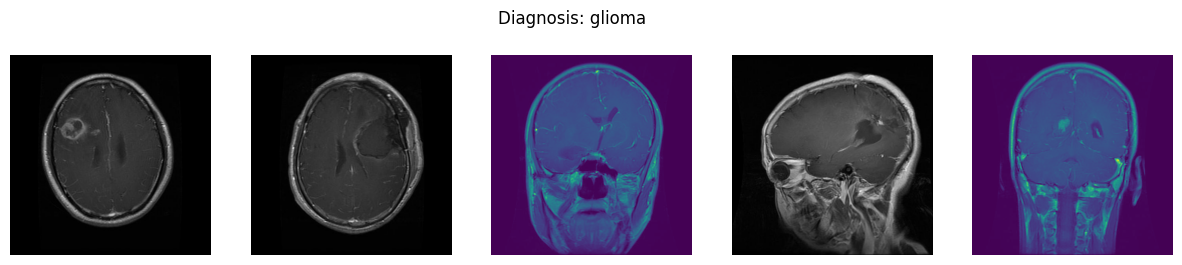

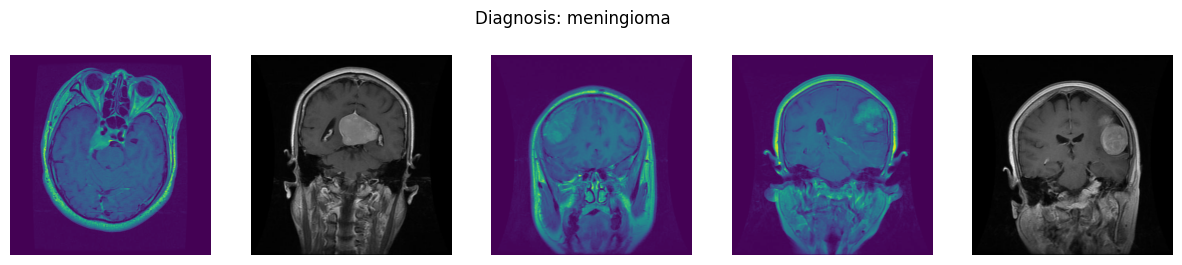

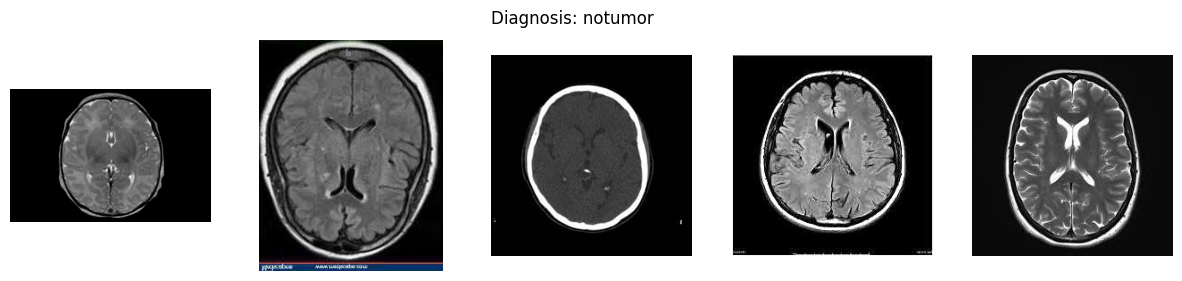

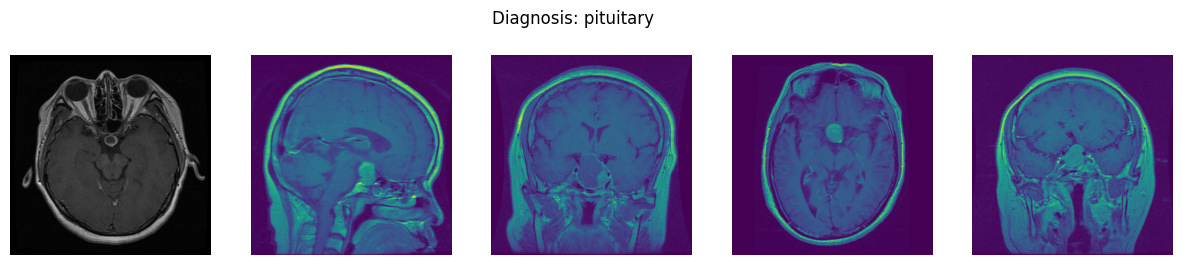

In [10]:
# Take 5 images from each diagnosis and visualise them, raw images without processing
for diag in diagnoses:
    samples = [item for item in image_data if item['diagnosis'] == diag]
    samples = random.sample(samples, k=5)  
    
    plt.figure(figsize=(15, 3))
    for i, item in enumerate(samples):
        plt.subplot(1, 5, i + 1)
        plt.imshow(item['image'])
        plt.axis('off')
    plt.suptitle(f"Diagnosis: {diag}")
    plt.show()


## Findings
The brain tumors dataset consists of 4 different brain diagnoses: Glioma, meningioma, pituitary and healthy (known as notumor). There are 7023 images; 5712 for training (81.33%) and 1311 for testing (18.67%) divided closely between the four diagnoses, also each subset is well divided among the 4 classes with a maximum of 27.92% for healthy brain and a minimum of 23.13% for glioma in the training set, with nearly similar results for the testing set indicating a good class balance to start with.

However, the image dimensions by diagnosis chart shows a huge variance in image dimensions that needs to be handled as part of the data preparation, we need to choose a common image size for all the images which may affect the performance of the model as certain parts of the brain may/may not be taken when resizing especially when it comes to locating tumors within the brain. Also the fact that some images have different color modes (3926 RGB and 3093 Greyscale) so we need to ensure consistency among shapes and channels to avoid potential issues.

# Data Preparation